In [5]:
import cv2 
import numpy as np 

In [43]:
def cosine_similarity(x, y):
    numerator = np.dot(x, y) 
    denominator = np.linalg.norm(x) * np.linalg.norm(y)
    return numerator / denominator 

In [52]:
def window_based_matching(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)
    left  = left.astype(np.float32)
    right = right.astype(np.float32)
    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)
    kernel_half = int((kernel_size - 1) / 2)
    scale = 3

    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):
            disparity = 0
            cost_optimal  = -1
            for j in range(disparity_range):
                d = x - j
                cost = -1
                if (d - kernel_half) > 0:
                    wp = left[(y-kernel_half):(y+kernel_half)+1, (x-kernel_half):(x+kernel_half)+1]
                    wqd = right[(y-kernel_half):(y+kernel_half)+1, (d-kernel_half):(d+kernel_half)+1]
                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()
                    cost = cosine_similarity(wp_flattened, wqd_flattened)
                if cost > cost_optimal:
                    cost_optimal = cost
                    disparity = j
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        cv2.imwrite('window_based_cosine_similarity.png', depth)
        cv2.imwrite('window_based_cosine_similarity_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
    print('Done.')
    return depth

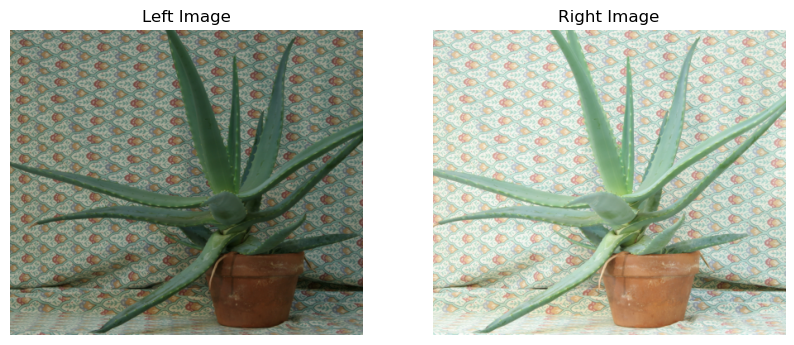

In [53]:
import cv2
import matplotlib.pyplot as plt 

left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_2.png'
disparity_range = 64 
kernel_size=5

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(left)
plt.axis('off')
plt.title('Left Image')

plt.subplot(1, 2, 2)
plt.imshow(right)
plt.axis('off')
plt.title('Right Image')

plt.show()


Saving result...
Done.


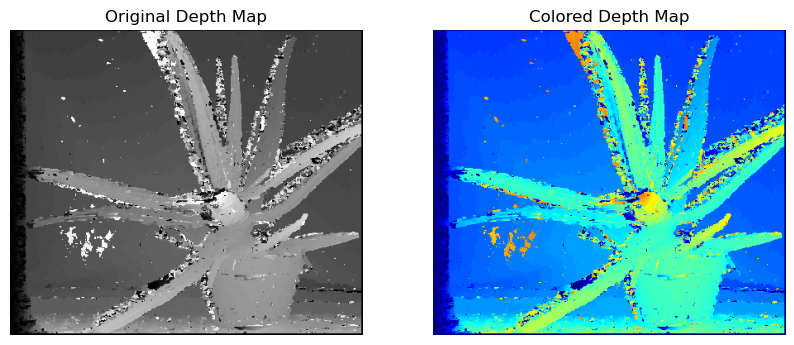

In [55]:
import cv2 
import matplotlib.pyplot as plt 

depth = window_based_matching(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(depth, cmap='gray')
plt.axis('off')
plt.title('Original Depth Map')

plt.subplot(1, 2, 2)
colored_depth = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
colored_depth = cv2.cvtColor(colored_depth, cv2.COLOR_BGR2RGB)
plt.imshow(colored_depth)
plt.axis('off')
plt.title('Colored Depth Map')

plt.show()